In [1]:
# -*- unicode: utf-8 -*-
from __future__ import division
import os 
import json
import math
import codecs
import string
import matplotlib.pyplot as plt
import numpy as np

from time import time
from sklearn import metrics
from sklearn.utils.extmath import density
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
if os.name is 'nt':
    file_path_delim = '\\'
    dataset_path = '\\dataSets\\kose_yazarlari\\kose_yazilari\\'
elif os.name is 'posix':
    file_path_delim = '/'
    dataset_path = '/dataSets/kose_yazarlari/kose_yazilari/'

In [3]:

relative_path = os.getcwd() + dataset_path

tokenizer = lambda doc: doc.lower().split(" ")

datas_path = [relative_path + f for f in os.listdir(relative_path)] 

datas_path

['C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Can_Dundar',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Cuneyt_Ozdemir',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Ece_Temelkuran',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Emre_Uslu',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Ilber_Ortayli',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Ismail_Kucukkaya',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Mustafa_Balbay',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BIL495\\Codes\\BIL495\\dataSets\\kose_yazarlari\\kose_yazilari\\Samil_Tayyar',
 'C:\\Users\\Gurol\\Documents\\Lessons\\BI

In [5]:
writer_names = [p[p.rfind(file_path_delim)+1:] for p in datas_path]

writer_names

['Can_Dundar',
 'Cuneyt_Ozdemir',
 'Ece_Temelkuran',
 'Emre_Uslu',
 'Ilber_Ortayli',
 'Ismail_Kucukkaya',
 'Mustafa_Balbay',
 'Samil_Tayyar',
 'Ugur_Dundar',
 'Yekta_Kopan']

In [6]:
def read_from_file(file_path):
    with codecs.open(file_path,'r',encoding='utf-8', errors='ignore') as f:
        return f.read()


In [7]:

def read_data( file_path_list ):

    X = [] # inputs
    y = [] # labels

    for i in range(0,len(file_path_list)):
        for f in os.listdir(file_path_list[i]):
            if f.startswith('.'):
                continue
            else: 
                X.append(read_from_file(file_path_list[i] + file_path_delim + f))
                y.append(i)
    return X, y


In [8]:
X, y = read_data(datas_path)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [11]:
# FEATURE EXTRACTION : Create Feature Vector
vectorizer = TfidfVectorizer(norm='l2', min_df=0.05, use_idf=True, smooth_idf=False, sublinear_tf=True,tokenizer=tokenizer)

In [13]:
# Fit feature vector
t0 = time()
X_train = vectorizer.fit_transform(X_train)
duration = time() - t0

'X_train duration time: ', duration

('X_train duration time: ', 0.4019134044647217)

In [14]:
t0 = time()
X_test = vectorizer.transform(X_test)
duration = time() - t0

'X_test duration time: ', duration

('X_test duration time: ', 0.035022735595703125)

In [15]:
X_train.shape

(400, 952)

In [16]:
X_test.shape

(100, 952)

In [17]:
y_train

[7,
 8,
 2,
 4,
 9,
 5,
 9,
 2,
 6,
 1,
 7,
 4,
 6,
 8,
 9,
 5,
 2,
 7,
 6,
 4,
 1,
 5,
 0,
 3,
 5,
 6,
 1,
 9,
 0,
 0,
 8,
 3,
 3,
 1,
 2,
 0,
 8,
 3,
 0,
 9,
 9,
 4,
 2,
 2,
 6,
 2,
 3,
 6,
 5,
 2,
 1,
 9,
 4,
 1,
 4,
 3,
 4,
 9,
 8,
 6,
 8,
 8,
 0,
 4,
 9,
 4,
 6,
 8,
 8,
 0,
 2,
 6,
 4,
 6,
 0,
 9,
 1,
 8,
 5,
 3,
 9,
 0,
 4,
 3,
 9,
 9,
 1,
 5,
 8,
 3,
 3,
 4,
 8,
 7,
 8,
 5,
 0,
 5,
 9,
 1,
 8,
 7,
 6,
 9,
 0,
 6,
 6,
 2,
 3,
 0,
 0,
 5,
 6,
 2,
 0,
 0,
 8,
 5,
 9,
 6,
 1,
 4,
 8,
 3,
 0,
 6,
 2,
 3,
 7,
 8,
 0,
 3,
 2,
 2,
 7,
 9,
 6,
 1,
 8,
 8,
 0,
 2,
 1,
 3,
 1,
 7,
 8,
 7,
 3,
 2,
 9,
 9,
 6,
 5,
 6,
 4,
 6,
 1,
 6,
 3,
 0,
 4,
 7,
 1,
 2,
 7,
 9,
 1,
 0,
 2,
 8,
 7,
 1,
 4,
 5,
 7,
 9,
 9,
 1,
 4,
 7,
 7,
 6,
 0,
 5,
 5,
 8,
 1,
 2,
 3,
 0,
 1,
 7,
 2,
 0,
 1,
 6,
 6,
 0,
 3,
 6,
 8,
 5,
 8,
 7,
 5,
 2,
 8,
 3,
 4,
 1,
 0,
 2,
 0,
 2,
 5,
 5,
 4,
 8,
 4,
 9,
 5,
 8,
 8,
 6,
 7,
 6,
 5,
 4,
 3,
 6,
 6,
 4,
 5,
 9,
 8,
 0,
 9,
 3,
 1,
 6,
 2,
 3,
 2,
 7,
 2,
 4,
 9,
 3,
 7,


In [19]:
def benchmark(clf):
    print('_' * 80)
    print('Training')
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print('Train time: %0.3fs' % train_time)
    
    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print('Test time: %0.3fs' % test_time)
    
    score = metrics.accuracy_score(y_test, pred)
    print('accuracy: %0.3f' % score)

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [20]:
results = []
for clf, name in (
            (KNeighborsClassifier(n_neighbors=10), "kNN"),
            (RandomForestClassifier(n_estimators=100), "Random Forest"),
            (DecisionTreeClassifier(random_state=0), "Decision Tree")):
    
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,penalty=penalty)))

results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))



kNN
________________________________________________________________________________
Training
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
Train time: 0.002s
Test time: 0.008s
accuracy: 0.810
Random Forest
________________________________________________________________________________
Training
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Train time: 0.377s
Test time: 0.011s
accuracy: 0.780
Decision Tree
________________________________________________________________________________
Training
Decis

C:\Users\Gurol\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Gurol\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Train time: 0.209s
Test time: 0.001s
accuracy: 0.910
L1 penalty
________________________________________________________________________________
Training
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Train time: 0.201s
Test time: 0.001s
accuracy: 0.910
________________________________________________________________________________
Training
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
Train time: 0.003s
Test time: 0.001s
accuracy: 0.880
LinearSVC with L1-based feature selection
________________________________________________________________________________
Training
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=F

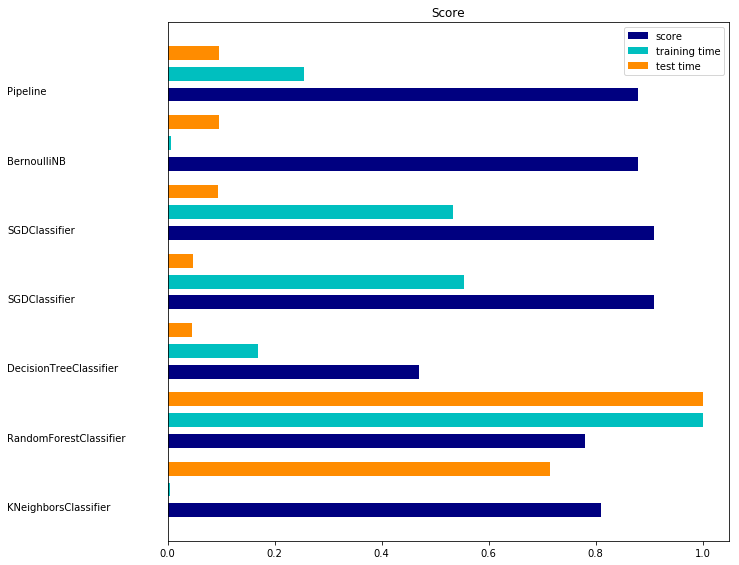

In [21]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results

training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12,8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time", color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)
    
plt.show()
